In [1]:
from pylab import *
from matplotlib import image
%matplotlib inline
DEBUG = True

In [14]:
ls fish_data

fish-001.jpeg  fish-007.jpeg  fish-013.jpeg  fish-019.jpeg  fish-025.jpeg
fish-002.jpeg  fish-008.jpeg  fish-014.jpeg  fish-020.jpeg  fish-026.jpeg
fish-003.jpeg  fish-009.jpeg  fish-015.jpeg  fish-021.jpeg  fish-027.jpeg
fish-004.jpeg  fish-010.jpeg  fish-016.jpeg  fish-022.jpeg  fish-028.jpeg
fish-005.jpeg  fish-011.jpeg  fish-017.jpeg  fish-023.jpeg  fish-029.jpeg
fish-006.jpeg  fish-012.jpeg  fish-018.jpeg  fish-024.jpeg  fish-030.jpeg


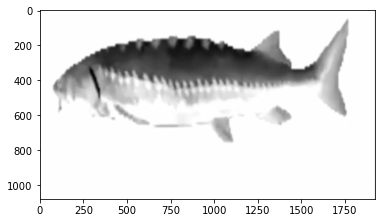

In [3]:
from skimage import color, filters, morphology
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from collections import deque

def get_fish(fish_id):
    img = color.rgb2gray(io.imread('fish_data/fish-'+str(fish_id).zfill(3)+'.jpeg'))
    return img

#image_rescaled = rescale(image, 0.25, anti_aliasing=False)

imshow( rescale(get_fish(9), 1), cmap='gray')

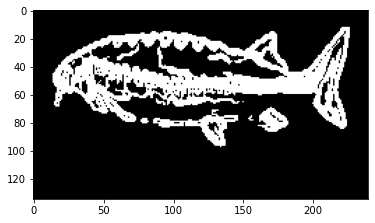

In [10]:
edge_sobel = filters.sobel( rescale(get_fish(10), 0.125) )
imshow(edge_sobel > 0.03, cmap='gray')

(68, 120)


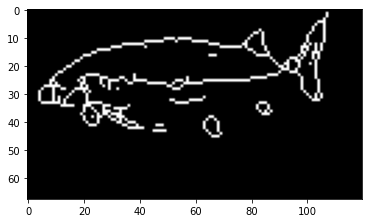

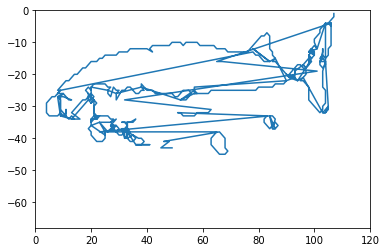

In [13]:
def get_beams( fish_id, downsample = 1.0/16, thresh = 0.08 ):
    fish_edge_sobel = filters.sobel( rescale(get_fish(fish_id), downsample) )
    fish_bw = fish_edge_sobel > thresh
    fish_skelet = morphology.skeletonize(fish_bw) 
    if DEBUG: imshow( fish_skelet, cmap='gray')
    if DEBUG: print ( shape(fish_skelet) )
    
    x = np.array([])
    y = np.array([])
    
    total_px = 0
    
#     Drawing le fish - DFS method
    q = []
    
    for i in range(0, shape(fish_skelet)[0]):
        for j in range(0, shape(fish_skelet)[1]):
            px = int(fish_skelet[i, j])
            if (px == 1):
                q.append([ i, j ])
                while len(q) > 0:
                    [ ii, jj ] = q.pop()
                    fish_skelet[ii, jj] = 0
                    if ( fish_skelet[ii+1,jj] == 1 ): q.append([ ii+1, jj ])
                    if ( fish_skelet[ii-1,jj] == 1 ): q.append([ ii-1, jj ])
                    if ( fish_skelet[ii,jj+1] == 1 ): q.append([ ii, jj+1 ])
                    if ( fish_skelet[ii,jj-1] == 1 ): q.append([ ii, jj-1 ])
                    if ( fish_skelet[ii+1,jj+1] == 1 ): q.append([ ii+1, jj+1 ])
                    if ( fish_skelet[ii-1,jj+1] == 1 ): q.append([ ii-1, jj+1 ])
                    if ( fish_skelet[ii+1,jj-1] == 1 ): q.append([ ii+1, jj-1 ])
                    if ( fish_skelet[ii-1,jj-1] == 1 ): q.append([ ii-1, jj-1 ])
                    x=np.append(x,np.array(jj))
                    y=np.append(y,np.array(ii))
     
    if DEBUG:
        plt.figure()
        plt.plot(x,-y)
        plt.xlim([0, shape(fish_skelet)[1]])
        plt.ylim([-shape(fish_skelet)[0], 0])
    
    return x,y
    
x, y = get_beams( 8 );

5
10
15
20
25
30


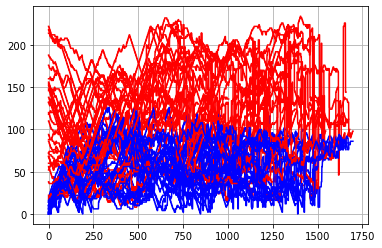

In [6]:
DEBUG = False

grid()

x_tot = np.array([])
y_tot = np.array([])

# for fish_id in range(1, 31):
    if (fish_id%5 == 0): print(fish_id)
    x, y = get_beams( fish_id );

    #x = [item for item in x for i in range(3)]
    x_ext = [i for i in x for j in range(3)]
    y_ext = [i for i in y for j in range(3)]
    
    #print(len(x_ext), len(y_ext))
    
    x_tot = np.append(x_tot, 2*np.array(x_ext))
    y_tot = np.append(y_tot, 2*np.array(y_ext))
    
    plot(2*np.array(x_ext), 'r')
    plot(2*np.array(y_ext), 'b')

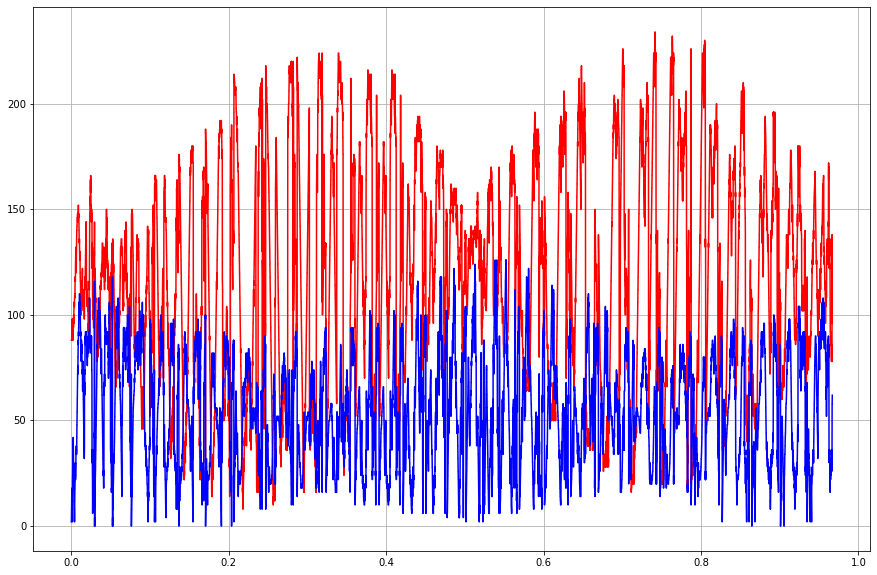

In [7]:
figure(figsize = (15,10))
t = np.arange( 0, len(x_tot) ) * 1/42000
plot(t, x_tot, 'r')
plot(t, y_tot, 'b')
grid()

In [10]:
from scipy.io.wavfile import write

x_tot_mult = np.tile(x_tot, 50)
y_tot_mult = np.tile(y_tot, 50)

rate = 44100
data = np.random.uniform(-1, 1, rate) # 1 second worth of random samples between -1 and 1
scaled = ( np.array([x_tot_mult, y_tot_mult]) / max( max(x_tot), max(y_tot) ) ) * 2 * 1 - 1
write('test.wav', rate, scaled.transpose() )

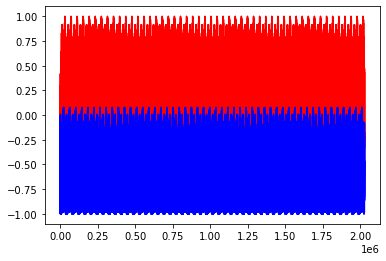

In [11]:
plot(scaled[0, :], 'r')
plot(scaled[1, :], 'b')

In [302]:
tile([1,2,3], 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])